# US House Price Index

In [2]:
import pandas as pd

file_path = 'US_House_Price.csv'
house_price_data = pd.read_csv(file_path)
house_price_data.head()

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
0,2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
1,2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2,2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
3,2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
4,2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735


## Exploratory Data Analysis

### Descriptive Statistics

In [6]:
descriptive_stats = house_price_data.describe()
descriptive_stats

,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,1309.350000,212.851467,4.876750,18095.159938,55.550000,34.677450,13493.480833,1.301625,4.683308,1201.716667,121344.45000,0.324583,6.012083,81.261200,180.657817
std,479.881055,44.566715,3.305235,2002.293963,25.383865,6.006483,1837.485256,1.578512,1.110667,423.857641,6113.86894,1.950373,2.034118,1.055429,41.255706
min,513.000000,144.400000,1.410000,14614.141000,20.000000,25.930000,10674.000000,0.050000,2.684000,520.000000,111278.00000,-5.900000,3.500000,79.583000,128.461000
25%,979.000000,184.275000,2.087500,16547.088000,36.000000,29.785000,12115.575000,0.120000,3.801375,839.000000,116590.00000,-0.800000,4.575000,80.395750,148.123000
50%,1285.500000,207.450000,3.525000,17576.126000,49.000000,33.544500,12999.350000,0.400000,4.456750,1181.500000,121771.50000,0.800000,5.400000,81.209000,172.496500
75%,1685.000000,224.525000,7.830000,19716.162500,71.000000,37.877250,14820.075000,2.000000,5.752500,1440.000000,126564.50000,1.600000,7.350000,82.107500,197.462000
max,2263.000000,353.015000,11.480000,21989.981000,127.000000,48.021000,20422.600000,5.260000,6.900000,2245.000000,131202.00000,5.000000,14.700000,83.084000,304.755000


* The dataset covers a wide range of variables, including building permits, construction price index, delinquency rate, GDP, etc.
* The home price index which is our primary variable of interest ranges from 128.461 to 304.755 with a mean of 180.658.
* Other notable variables like GDP and income show a substantial range, indicating economic changes over the period covered.

### Missing Values

In [9]:
missing_values = house_price_data.isnull().sum()
missing_values

DATE                      0
building_permits          0
const_price_index         0
delinquency_rate          0
GDP                       0
house_for_sale_or_sold    0
housing_subsidies         0
income                    0
interest_rate             0
mortgage_rate             0
construction_unit         0
total_houses              0
total_const_spending      0
unemployment_rate         0
urban_population          0
home_price_index          0
dtype: int64

* There are no missing values in the dataset.

### Data Types

In [12]:
data_types = house_price_data.dtypes
data_types

DATE                       object
building_permits            int64
const_price_index         float64
delinquency_rate          float64
GDP                       float64
house_for_sale_or_sold      int64
housing_subsidies         float64
income                    float64
interest_rate             float64
mortgage_rate             float64
construction_unit           int64
total_houses              float64
total_const_spending      float64
unemployment_rate         float64
urban_population          float64
home_price_index          float64
dtype: object

* Most of our variables are numerical (either **'int64'** or **'float64'**.)
* The **'DATE'** column is of type 'object', which is typical for date strings.

## Data Visualization

### Correlation Matrix

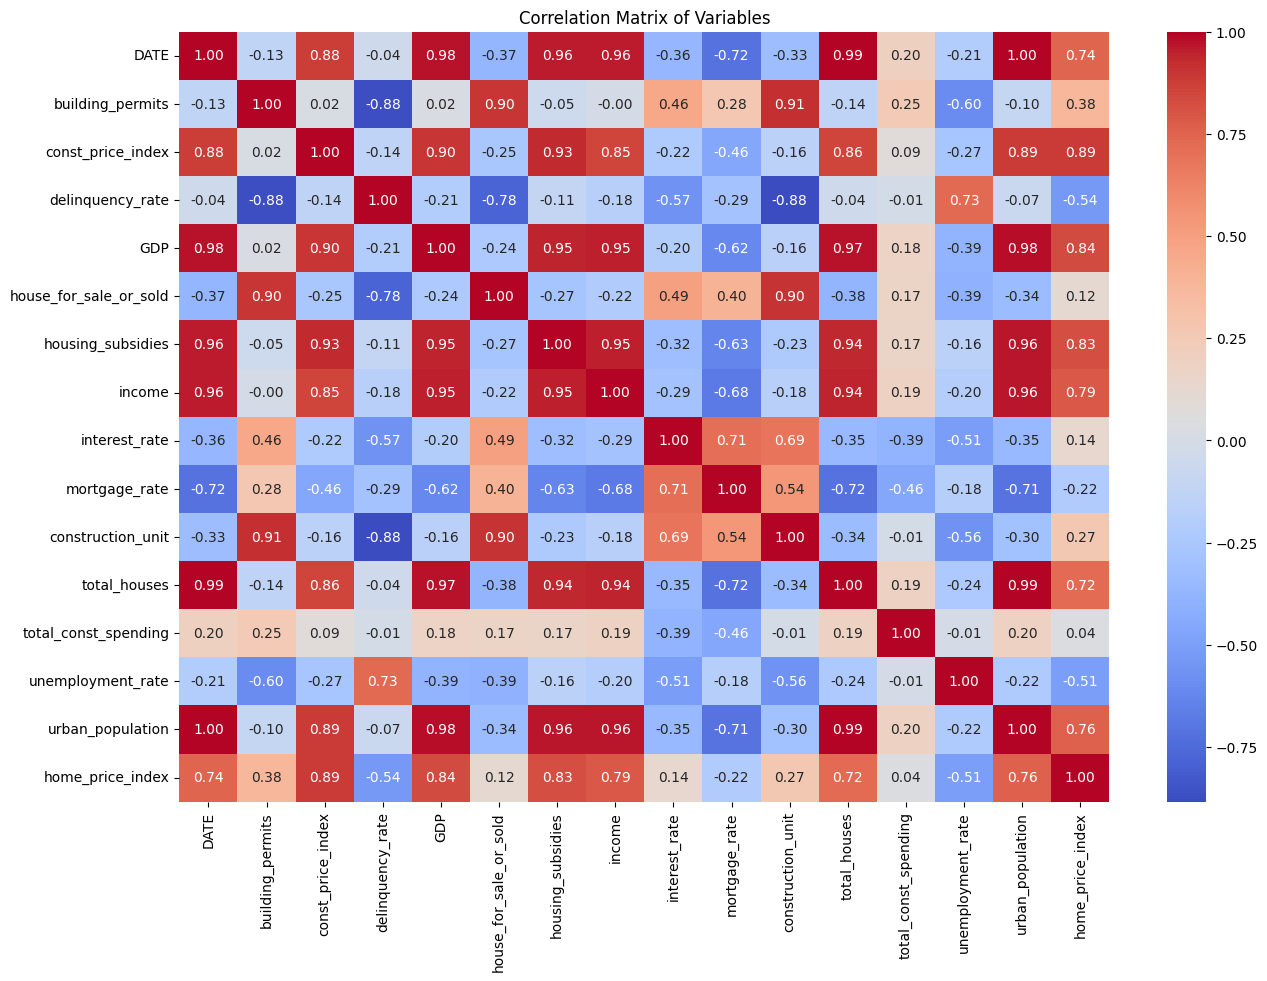

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

house_price_data['DATE'] = pd.to_datetime(house_price_data['DATE'])


correlation_matrix = house_price_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

The heatmap displays the correlation matrix for the variables in the dataset. 
* **1** indicates a strong positive correlation.
* **-1** indicates a strong negative correlation. 
* **0** indicates no correlation.

### Trend of Home Price Index Over Time

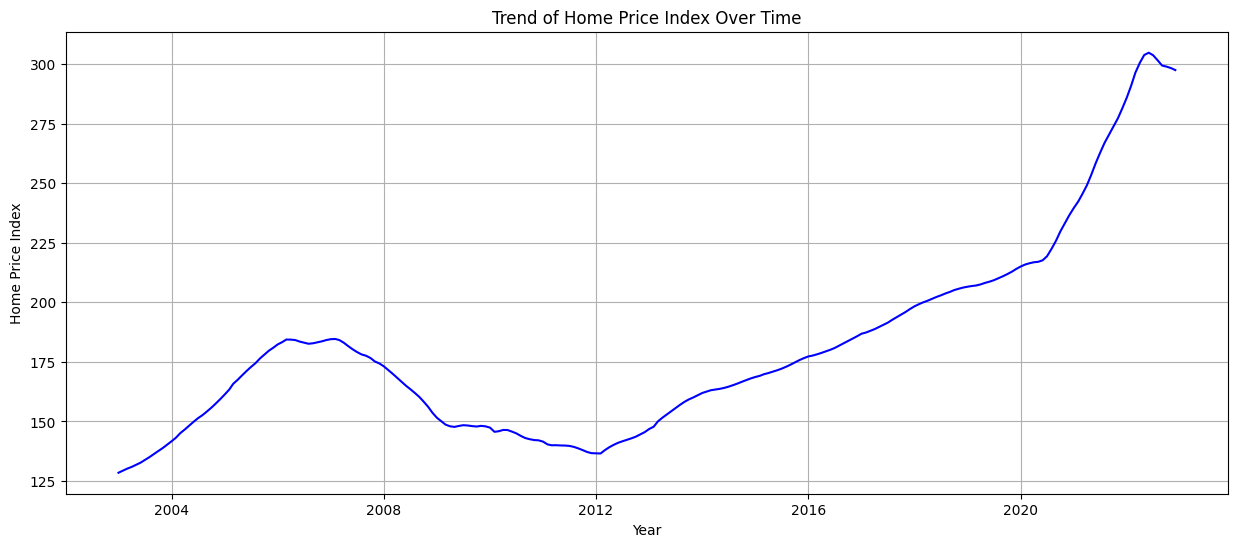

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(house_price_data['DATE'], house_price_data['home_price_index'], color='blue')
plt.title('Trend of Home Price Index Over Time')
plt.xlabel('Year')
plt.ylabel('Home Price Index')
plt.grid(True)
plt.show()

The plot above shows the trend of the Home Price Index over time. It provides a visual representation of how the home prices have changed throughout the period covered by the dataset. There's a clear trend of increase in the Home Price Index, with some fluctuations.

### Distribution of Key Variables

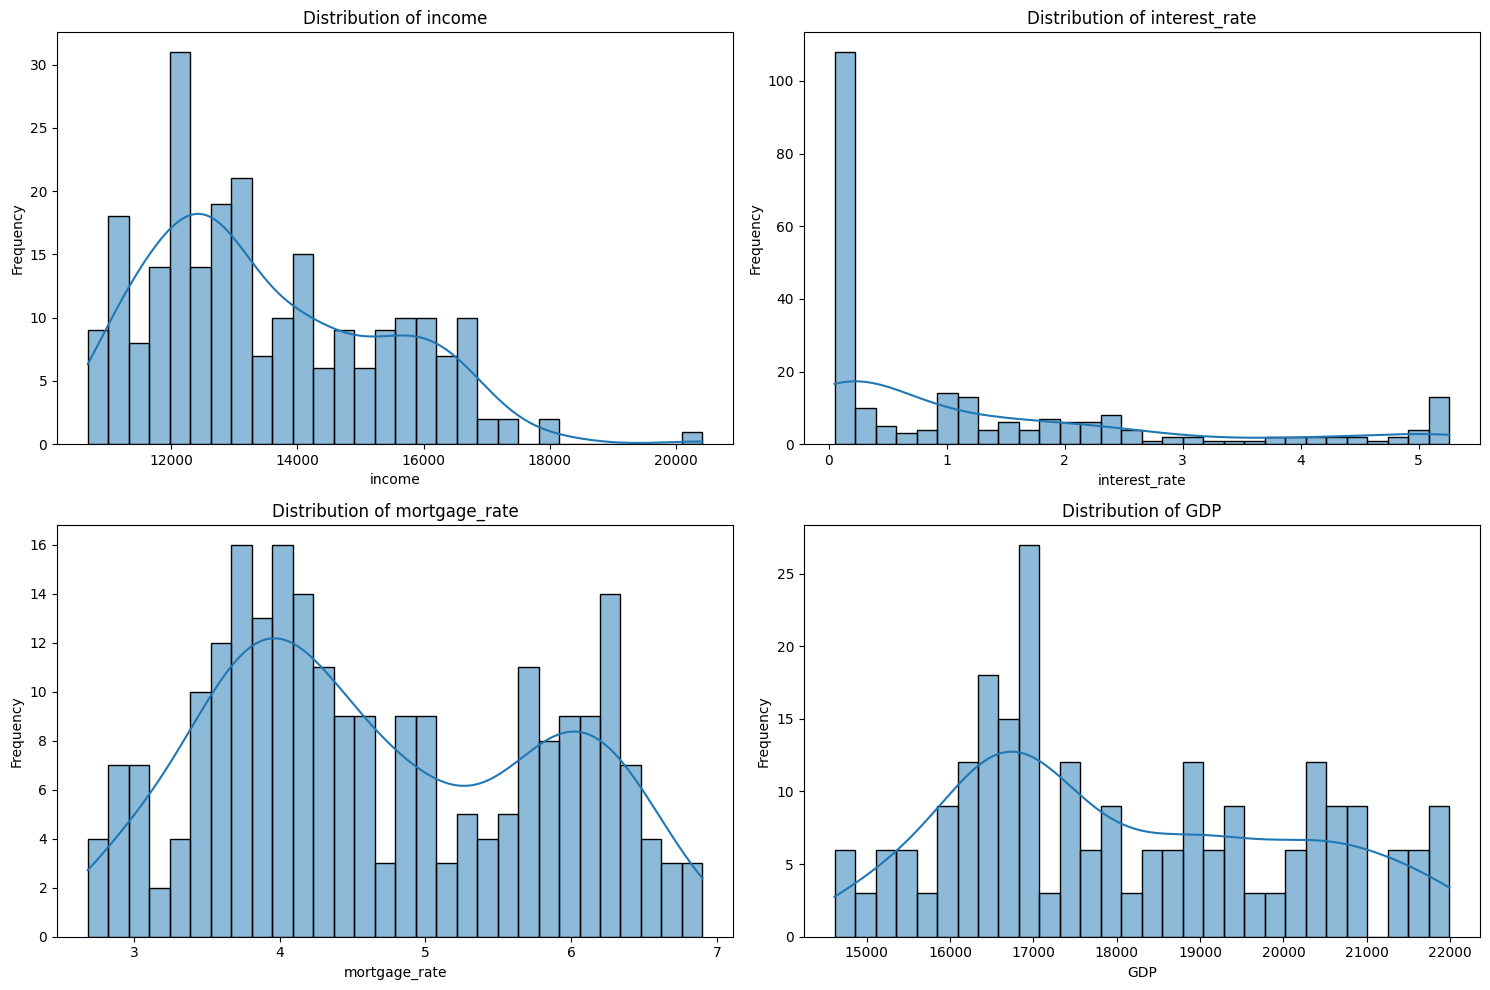

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


variables_to_plot = ['income', 'interest_rate', 'mortgage_rate', 'GDP']


for i, var in enumerate(variables_to_plot):
    sns.histplot(house_price_data[var], bins=30, ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {var}')
    axes[i//2, i%2].set_xlabel(var)
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

* **Income**: Shows a somewhat normal distribution, indicating a steady increase over time with a central peak.

* **Interest Rate**: Appears to have two peaks, suggesting periods of distinct interest rate regimes (possibly low and high interest rate periods).

* **Mortgage Rate**: Also displays a bimodal distribution, similar to the interest rate, which makes sense given the likely correlation between these two.

* **GDP**: The distribution of GDP is slightly skewed to the right, indicating growth over time with some fluctuations.tions.

### Scatter Plots for Key Correlations

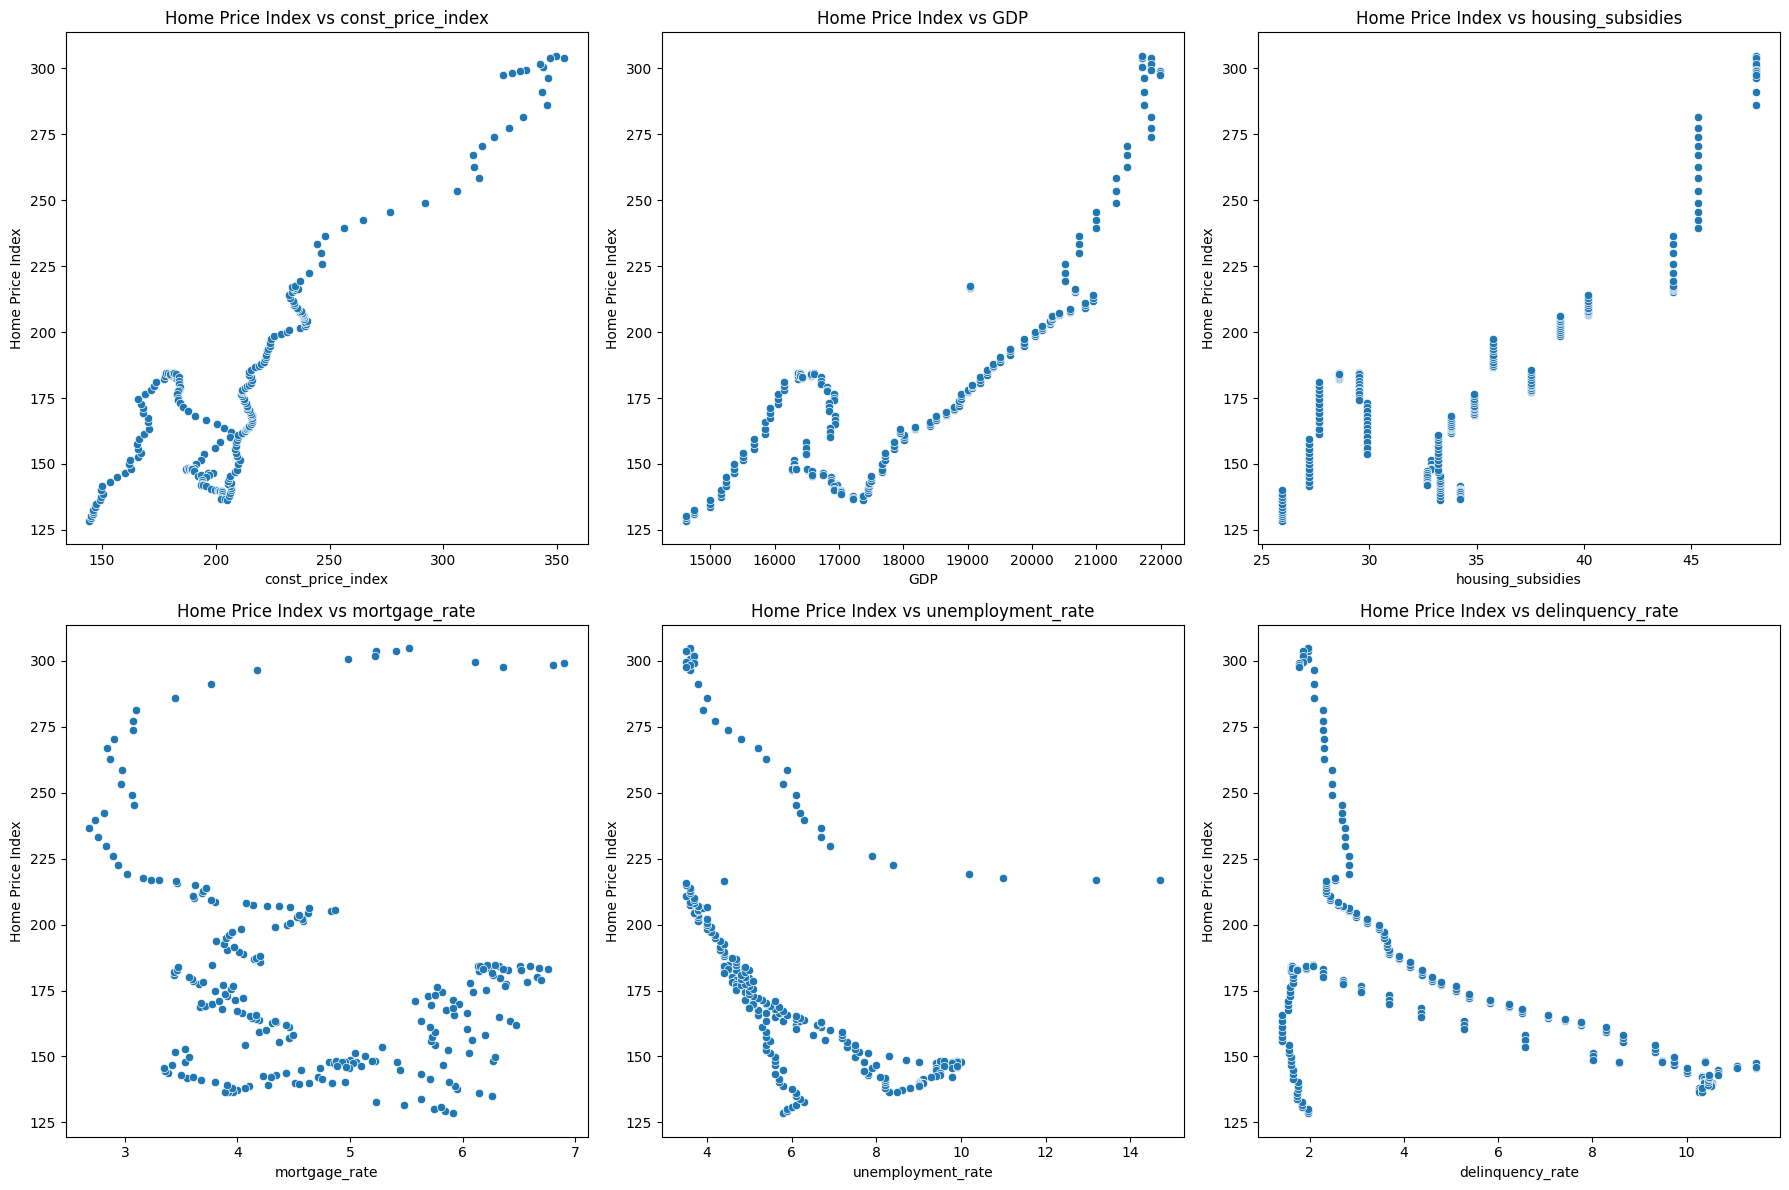

In [21]:
correlation_with_home_price = correlation_matrix['home_price_index'].sort_values(ascending=False)


correlation_with_home_price = correlation_with_home_price[correlation_with_home_price.index != 'home_price_index']

top_positive_correlations = correlation_with_home_price.head(3).index.tolist()

top_negative_correlations = correlation_with_home_price.tail(3).index.tolist()

variables_for_scatter_plot = top_positive_correlations + top_negative_correlations

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, var in enumerate(variables_for_scatter_plot):
    sns.scatterplot(x=house_price_data[var], y=house_price_data['home_price_index'], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Home Price Index vs {var}')
    axes[i//3, i%3].set_xlabel(var)
    axes[i//3, i%3].set_ylabel('Home Price Index')

plt.tight_layout()
plt.show()

* The first row shows variables with the highest positive correlations. These relationships show a trend where the Home Price Index increases with an increase in these variables.
* The second row shows variables with the highest negative correlations (if any were significantly negative). In these plots, a negative correlatio  appear as a trend where the Home Price Index decreases as these variables increase.

## Data Modelling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preparing data
X = house_price_data.drop(['home_price_index', 'DATE'], axis=1)  # Features
y = house_price_data['home_price_index']  # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating models
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

data = {
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'Mean Squared Error (MSE)': [19.41, 4.85],
    'R-squared (R²)': [0.9919, 0.9980]
}

df = pd.DataFrame(data)

print(df)

                      Model  Mean Squared Error (MSE)  R-squared (R²)
0         Linear Regression                     19.41          0.9919
1  Random Forest Regression                      4.85          0.9980


#### Interpretation

* **MSE** is a mesure of the average squared difference between the observed actual outcoming values and the values predicted by the model. Lower values of MSE indicate better fit.
* $R^{2}$ is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model. An $R^{2}$ of 1 indicates that the regression predictions perfectly fit the data. 0.9980


#### Conclusion
* Both models show very high R² values, indicating they both perform well in terms of explaining the variance in the Home Price Index.* 
The Random Forest model has a significantly lower MSE compared to the Linear Regression model, suggesting it has a better fit to the data, likely due to its ability to capture more complex, non-linear relationships between the variables.


#### Feature Importance Plot (Random Forest Model)

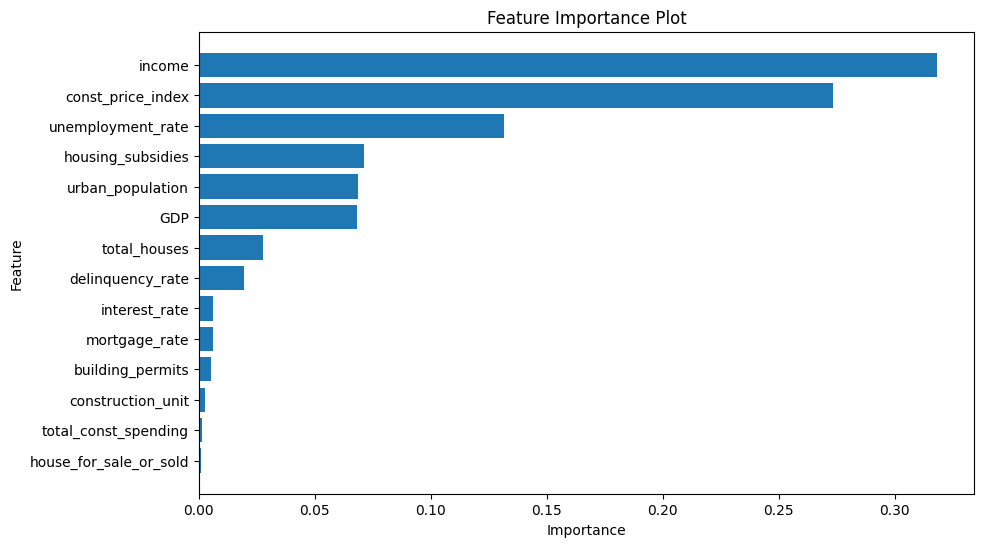

In [30]:
feature_importances = rf_model.feature_importances_


features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


features_df = features_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


#### Insights

* **Income** being the most influential factor aligns with economic intuition, as higher income levels can increase the purchasing power for homes, thereby affecting prices.
* **Construction Price Index** suggests that the cost of construction is a key driver of home prices.
* The importance of the **Unemployment Rate** indicates that general economic health (which affects employment) is a crucial factor in the housing market.

### Making Predictions

In [32]:
y_pred = rf_model.predict(X_test_scaled)


error = y_test - y_pred
error_percentage = (error / y_test) * 100


prediction_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': error,
    'Error Percentage': error_percentage
}).reset_index(drop=True)

prediction_comparison.head()

,Actual,Predicted,Error,Error Percentage
0,161.288,165.39944,-4.11144,-2.549130
1,133.777,135.00938,-1.23238,-0.921220
2,142.531,143.07499,-0.54399,-0.381664
3,136.533,138.90300,-2.37000,-1.735844
4,138.668,139.37369,-0.70569,-0.508906


## Time Series Analysis

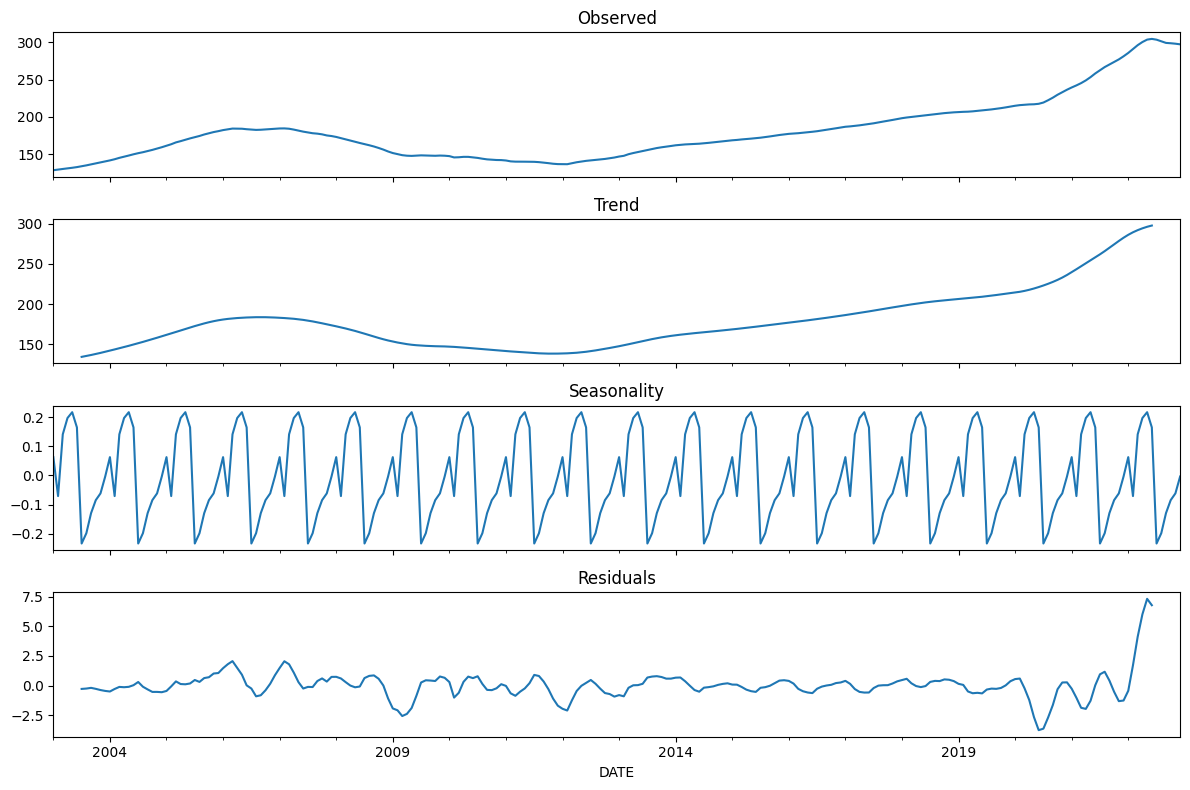

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose


ts_data = house_price_data.set_index('DATE')


decomposition = seasonal_decompose(ts_data['home_price_index'], model='additive', period=12)  # Assuming monthly data


fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonality')
decomposition.resid.plot(ax=axes[3], title='Residuals')

plt.tight_layout()
plt.show()

* **Observed**: This is the actual Home Price Index over time.

* **Trend**: Shows the long-term progression of the Home Price Index. There's a clear upward trend, indicating increasing home prices over the years.

* **Seasonality**: Reveals any repeating short-term cycle within the year. The seasonal component in this data doesn't show a pronounced pattern, suggesting that seasonality might not be a significant factor in this time series.

* **Residuals**: These are the irregularities or 'noise' remaining after the trend and seasonal components are removed. It represents the unexplained variation in the s

#### Conclusion from the time series analysis 

* The primary driver of changes in the Home Price Index appears to be the trend component, which aligns with economic growth and changes in the housing market over time.
* The lack of a strong seasonal component suggests that factors other than time of year are more influential in determining house prices in this dataset.eries.

### Time Series Forecasting

#### Stationarity Check

In [40]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    adf_results = dict(zip(labels, result[:4]))
    for key, value in adf_results.items():
        print(f'{key}: {value}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary.")

check_stationarity(ts_data['home_price_index'])

ADF Test Statistic: -0.6556858036473073
p-value: 0.8578965359560209
#Lags Used: 14
Number of Observations Used: 225
Weak evidence against null hypothesis, time series is non-stationary.


The Augmented Dickey-Fuller (ADF) test results indicate that the Home Price Index time series is non-stationary, as evidenced by a high p-value (greater than 0.05). For time series forecasting using models like ARIMA or SARIMA, we need the data to be stationary.

To achieve stationarity, we will apply differencing transformation. Differencing involves subtracting the current value of the series from the previous value. This often helps in removing trends or seasonal structures.

ADF Test Statistic: -2.9968947521909746
p-value: 0.03518541072076773
#Lags Used: 13
Number of Observations Used: 225
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data is stationary.


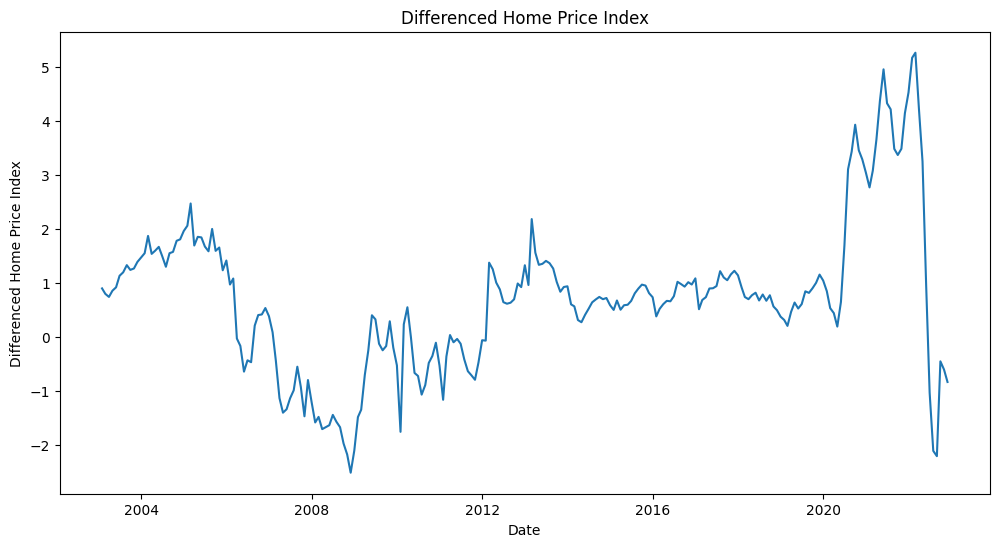

In [39]:

ts_diff = ts_data['home_price_index'].diff().dropna()

check_stationarity(ts_diff)

plt.figure(figsize=(12, 6))
plt.plot(ts_diff)
plt.title('Differenced Home Price Index')
plt.xlabel('Date')
plt.ylabel('Differenced Home Price Index')
plt.show()

The differenced Home Price Index series is now stationary, as indicated by the Augmented Dickey-Fuller test (with a p-value less than 0.05).  We can proceed with modelling. 

Given that the original series had a clear trend but no strong seasonality, an ARIMA (Autoregressive Integrated Moving Average) model would be appropriate. The ARIMA model is specified by three parameters: (p, d, q), where:

* **p** is the number of autoregressive terms,
* **d** is the number of nonseasonal differences needed for stationarity, and
* **q** is the number of lagged forecast errors in the prediction equation.
Since we already applied one differencing to achieve stationarity, d=1. We will use a model selection technique to determine the best values for p and q.

In [54]:
import itertools

# Defining the p, d, and q parameters to take values between 0 and 2
p = d = q = range(0, 3)

# Generating all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, [1], q))  # d is 1 as we already differenced the series once

# Searching for the best ARIMA model
best_aic = float("inf")
best_pdq = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(ts_data['home_price_index'], order=param)
        results = temp_model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

best_pdq, best_aic, best_model.summary()


C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shahi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shahi\AppData\Local\Programs\Python\Python312\L

((1, 1, 2),
 271.41513261648294,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:       home_price_index   No. Observations:                  240
 Model:                 ARIMA(1, 1, 2)   Log Likelihood                -131.708
 Date:                Sun, 24 Dec 2023   AIC                            271.415
 Time:                        18:51:29   BIC                            285.321
 Sample:                    01-01-2003   HQIC                           277.019
                          - 12-01-2022                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.9161      0.023     39.225      0.000       0.870       0.962
 ma.L1          0.2838      0.048    

#### Model Summary

The ARIMA model with the parameters (1, 1, 2) has been identified as the best fit based on the Akaike Information Criterion (AIC). The model summary is as follows:

* **ARIMA(1, 1, 2)**: This implies one autoregressive term (p=1), one differencing (d=1), and two moving average terms (q=2).
* The AIC value for this model is 271.415, which is the lowest among the models we test
* The coefficients of the AR and MA terms are statistically significant (p-values are less than 0.05), indicating a good fit.
* The Ljung-Box test and other diagnostic tests suggest that the model residuals are well-behaved.ed.

#### Forecasting

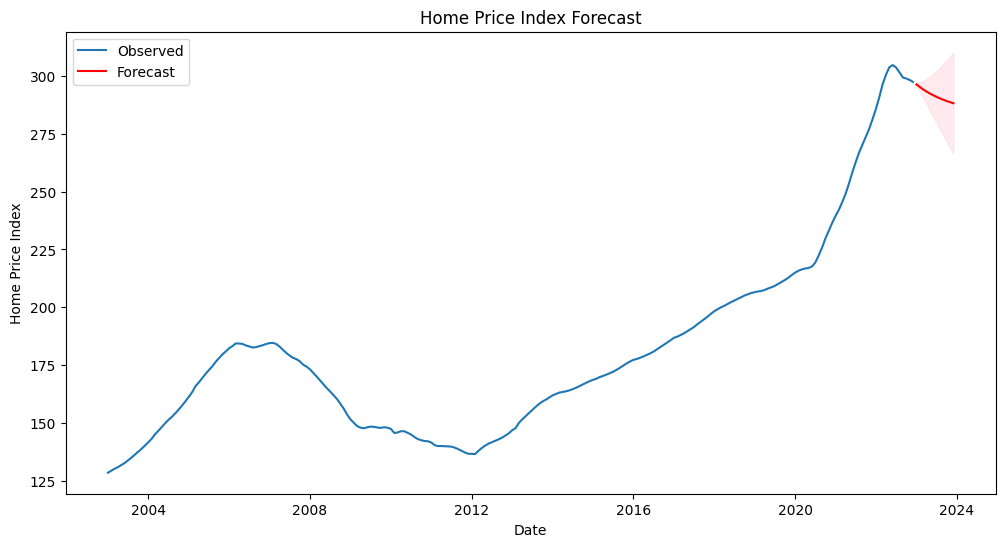

In [60]:
forecast = best_model.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
plt.figure(figsize=(12, 6))
plt.plot(ts_data['home_price_index'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Home Price Index Forecast')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.legend()
plt.show()


The forecast for the Home Price Index over the next 12 months is illustrated in the plot. The red line represents the forecasted values, and the pink shaded area shows the 95% confidence intervals for these predictions.

##### Observations 
* The forecast indicates a continued trend in the direction established by the historical data.
* The confidence intervals widen as we move further into the future, reflecting increasing uncertainty in the longer-term predictions.